In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib

/tmp/ipykernel_282349/1825730360.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('~/cluster10.sort', sep=',', 
                  names=['timestamp', 'key', 'key_size', 'value_size', 'client_id', 'op', 'ttl'])

In [3]:
df.columns


Index(['timestamp', 'key', 'key_size', 'value_size', 'client_id', 'op', 'ttl'], dtype='object')

In [4]:
vcs = df.timestamp.value_counts().sort_index(ascending=True)


In [13]:
vcs

timestamp
0         166
1         256
2         234
3         283
4         231
         ... 
617065    122
617066    141
617067    144
617068    134
617069     53
Name: count, Length: 616740, dtype: int64

In [10]:
xx = vcs.index.tolist()
yy = vcs.tolist()

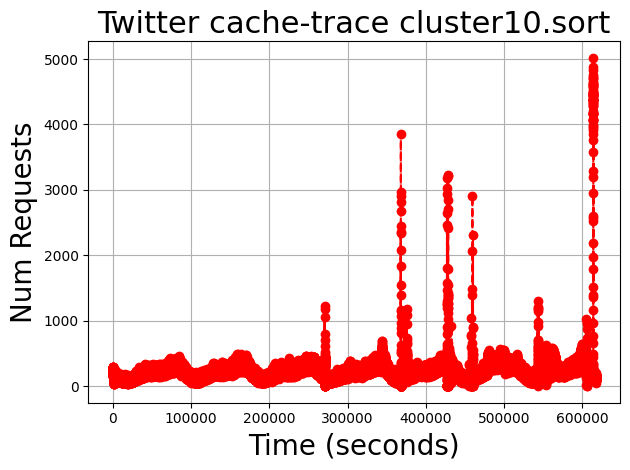

In [12]:
fig, ax = plt.subplots()
ax.errorbar(xx, yy, capsize=3, fmt="r--o", ecolor = "black")
ax.set_xlabel("Time (seconds)", fontsize=20)
ax.set_ylabel("Num Requests", fontsize=20)
ax.set_title(f"Twitter cache-trace cluster10.sort", size=22)

plt.grid()
plt.tight_layout()

In [8]:
print(len(vcs.tolist())/3600.0/24.0, ' days')

7.138194444444444  days


In [20]:
def binLogs(df, nbins=200000):
    return df.timestamp.value_counts(nbins).sort_index(ascending=True)
def speedUpLogs(yy, N=1):
    return [sum(yy[i:i + N]) for i in range(0, len(yy), N)]
    

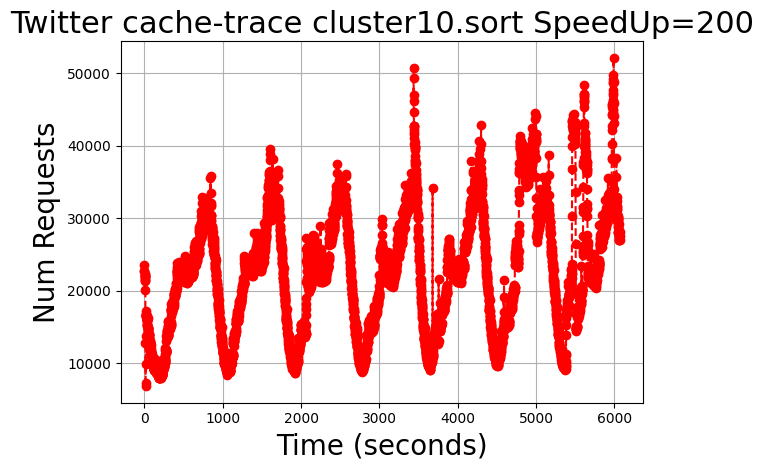

In [31]:
sp = speedUpLogs(yy, N=100)
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(sp)-100), sp[:-100], capsize=3, fmt="r--o", ecolor = "black")
ax.set_xlabel("Time (seconds)", fontsize=20)
ax.set_ylabel("Num Requests", fontsize=20)
ax.set_title(f"Twitter cache-trace cluster10.sort SpeedUp=200", size=22)
plt.grid()
plt.tight_layout()